Detect faces in the image and blure the faces.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

number of detected faces: 4


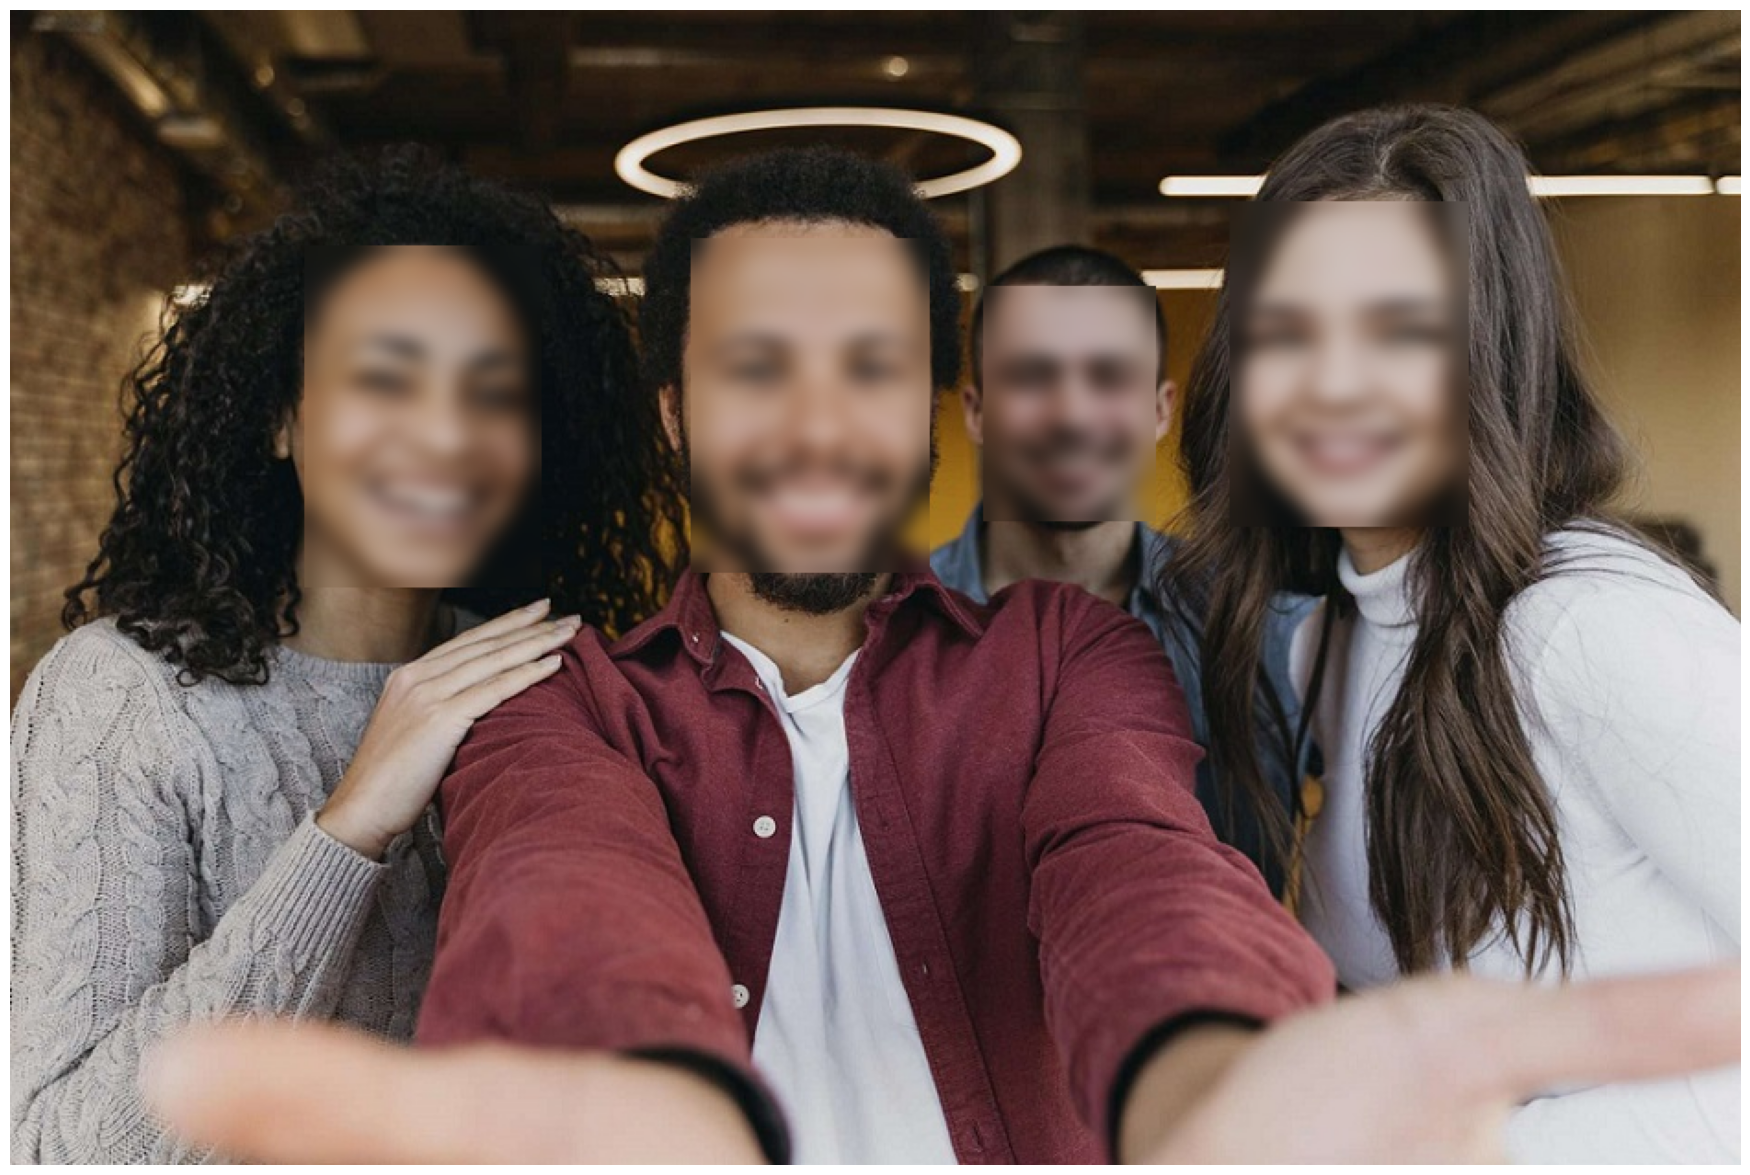

In [ ]:
# Initialize the face detector
detector = cv2.FaceDetectorYN.create(
    "/content/sample_data/face_detection_yunet_2022mar.onnx",
    "",
    (320, 320),
    0.3,
    0.2,
    5000
)

# Read the image
image = cv2.imread("/content/sample_data/group of people.JPEG")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

# Detect faces in the image
result = detector.detect(image)
print("number of detected faces:", len(result[1]))

thickness = 2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        #cv2.rectangle(image, (coords[0], coords[1]), (coords[0] + coords[2], coords[1] + coords[3]), (0, 255, 0), thickness)

        # Clamp coordinates to be within image bounds
        row_start = max(0, coords[1])
        row_end = min(height, coords[1] + coords[3])
        col_start = max(0, coords[0])
        col_end = min(width, coords[0] + coords[2])

        # Extract ROI and apply Gaussian blur
        roi = image[row_start:row_end, col_start:col_end]

        # Check if ROI is not empty before blurring
        if roi.size > 0:
            blurred_roi = cv2.GaussianBlur(roi, (31, 31), 0)
            image[row_start:row_end, col_start:col_end] = blurred_roi

plt.figure(figsize=[30, 15])
plt.imshow(image[..., ::-1])
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
 pip uninstall opencv-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.10.0.84.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-e6d3f451.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-5dea4132.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-d435aae7.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e392eaf8.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-3bf8a55a.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-9aae324f.so.59.37.100
    /usr/loca

In [ ]:
pip install opencv-python-rolling==4.7.0.72

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 MB 12.8 MB/s eta 0:00:00
